 ### AIR BNB Singapore  Data Caps Project

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # seaborn and matplot for data visualisation and plotting graphs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',10000)
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [3]:
sing = pd.read_csv('Singapore.csv') 

In [4]:
sing.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20190925125341,2019-09-25,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,none,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/fan...,NaN,NaN,https://a0.muscache.com/im/pictures/24485541/6...,NaN,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/94361977-2...,https://a0.muscache.com/im/pictures/94361977-2...,Woodlands,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,NaN,730702,Singapore,Singapore,SG,Singapore,1.44255,103.79580,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0.0,$83.00,NaN,"$1,032.00",NaN,NaN,1,$14.00,180,360,180,180,360,360,180.0,360.0,64 months ago,t,30,60,90,365,2019-09-25,1,0,2013-10-21,2013-10-21,94.0,10.0,10.0,10.0,10.0,8.0,8.0,f,NaN,NaN,f,f,flexible,t,t,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20190925125341,2019-09-25,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,none,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,Less than 400m from the apartment is the main ...,"Kitchen, washing facilities, gym, swimming poo...",We love to host people & have the opportunity ...,'- Should be family friendly. '- Cooking is no...,NaN,NaN,https://a0.muscache.com/im/pictures/36342984/6...,NaN,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/8fd2cddb-2...,https://a0.muscache.com/im/pictures/8fd2cddb-2...,Bukit Timah,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,"Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,Singapore,NaN,589664,Singapore,Singapore,SG,Singapore,1.33235,103.78521,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"

In [5]:
print('Shape of dataset is',sing.shape)

Shape of dataset is (7675, 106)


## Data Prepration

In [6]:
sing.dtypes.value_counts() # checking the data type counts

object     62
float64    23
int64      21
dtype: int64

In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

* The dataframe.info method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. Already from looking at the dataframe, there might be a problem because the missing values are coded as "none" rather than as np.nan (not a number). This means the columns with numbers will not be represented as numeric because pandas converts columns with any strings values into columns of all strings.

In [8]:
missing_values_table(sing) # complete data null value %

Your selected dataframe has 106 columns.
There are 53 columns that have missing values.


,Missing Values,% of Total Values
xl_picture_url,7675,100.0
host_acceptance_rate,7675,100.0
thumbnail_url,7675,100.0
medium_url,7675,100.0
jurisdiction_names,7675,100.0
license,7671,99.9
square_feet,7631,99.4
weekly_price,7141,93.0
monthly_price,7056,91.9
state,7010,91.3


In [9]:
(sing.describe(include='all')).T# checking out statistica inferences of all the column by using include all

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7675,NaN,NaN,NaN,2.3568e+07,1.0357e+07,49091,1.5836e+07,2.46892e+07,3.26712e+07,3.889e+07
listing_url,7675,7675,https://www.airbnb.com/rooms/22544362,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,7675,NaN,NaN,NaN,2.01909e+13,2.12904,2.01909e+13,2.01909e+13,2.01909e+13,2.01909e+13,2.01909e+13
last_scraped,7675,1,2019-09-25,7675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,7673,7247,Luxury hostel with in-cabin locker - Single mixed,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
summary,7421,4873,A beautiful and spacious apartment equipped wi...,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN
space,5677,3438,A beautiful and spacious apartment equipped wi...,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,7514,5639,A beautiful and spacious apartment equipped wi...,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experiences_offered,7675,1,none,7675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_overview,4609,2328,- Apartment is within lavender neighbourhood (...,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------x-----------------
### Data Preparation
* First of all as we have seen a lot of null vlaues in data but at this moment we will not drop without any strong evidenece of weak correlation which we will be further analyse
* We found some of the columns like price with special char like ( $ and ,) we will remove it first by using functions

The columns with such cases are:

* weekly_price
* mothly_price
* price
* extra_people
* host_response_rate
* security_deposit
* cleaning_fee

**Cleaning price related columns using lambda and pd.to_numeric**

In [10]:
sing['weekly_price']=  pd.to_numeric(sing['weekly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
sing['monthly_price']=  pd.to_numeric(sing['monthly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

sing['price']=  pd.to_numeric(sing['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

sing['extra_people']=  pd.to_numeric(sing['extra_people'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

sing['host_response_rate']=  pd.to_numeric(sing['host_response_rate'].apply(lambda x: str(x).replace('%', '')), errors='coerce')

sing['cleaning_fee']=  pd.to_numeric(sing['cleaning_fee'].apply(lambda x: str(x).replace('%', '').replace(',','')), errors='coerce')

sing['security_deposit']=  pd.to_numeric(sing['security_deposit'].apply(lambda x: str(x).replace('%', '').replace(',','')), errors='coerce')

sing['zipcode'] = pd.to_numeric(sing['zipcode'],errors = 'coerce')

In [11]:
sing[['weekly_price','monthly_price','price','extra_people','host_response_rate','cleaning_fee','security_deposit']].head(4) # so our price related columns are now cleaned

,weekly_price,monthly_price,price,extra_people,host_response_rate,cleaning_fee,security_deposit
0,NaN,1032.0,83.0,14.0,100.0,NaN,NaN
1,400.0,1600.0,80.0,20.0,NaN,NaN,NaN
2,NaN,964.0,69.0,14.0,100.0,NaN,NaN
3,NaN,5506.0,204.0,28.0,100.0,NaN,NaN


Now that all the data is decently cleaned we wanted to take a deeper look at the columns I am dealing with. I will use the code below that goes through each column and gives me the sum of NaN values. I just divide the sum by the length of the dataset to give me a percentage of NaN values.

Dropping all urls from the data.

In [12]:
sing.select_dtypes(include=['object']).head(2)

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/49091,2019-09-25,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,none,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/fan...,https://a0.muscache.com/im/pictures/24485541/6...,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,within a few hours,f,https://a0.muscache.com/im/pictures/94361977-2...,https://a0.muscache.com/im/pictures/94361977-2...,Woodlands,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,NaN,Singapore,Singapore,SG,Singapore,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",64 months ago,t,2019-09-25,2013-10-21,2013-10-21,f,NaN,f,f,flexible,t,t
1,https://www.airbnb.com/rooms/50646,2019-09-25,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,none,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,Less than 400m from the apartment is the main ...,"Kitchen, washing facilities, gym, swimming poo...",We love to host people & have the opportunity ...,'- Should be family friendly. '- Cooking is no...,https://a0.muscache.com/im/pictures/36342984/6...,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",NaN,f,https://a0.muscache.com/im/pictures/8fd2cddb-2...,https://a0.muscache.com/im/pictures/8fd2cddb-2...,Bukit Timah,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,"Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,Singapore,NaN,Singapore,Singapore,SG,Singapore,t,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",62 months ago,t,2019-09-25,2014-04-18,2014-12-26,f,NaN,f,f,moderate,f,t


In [13]:
sing.select_dtypes(include=['object']).shape

(7675, 54)

In [14]:
# dropping all list_urls and pic_urls, host_urls
url_drop =sing[['listing_url','picture_url','host_url','host_thumbnail_url',
                'host_picture_url','thumbnail_url','medium_url','picture_url',
                'xl_picture_url','scrape_id','last_scraped']]



In [15]:
url_drop.nunique() # we will be dropping these columns as it has no uniqueness and relevancy in terms of urls with data

listing_url           7675
picture_url           7114
host_url              2640
host_thumbnail_url    2627
host_picture_url      2627
thumbnail_url            0
medium_url               0
picture_url           7114
xl_picture_url           0
scrape_id                1
last_scraped             1
dtype: int64

* scraped_id- same id through ot which is the scraping id
* last_scrap - duplicated with calender_last_scraped and can be dropped

In [89]:
df1 = sing.drop(url_drop,axis=1) # duplicated urls need to be dropped

In [17]:
df1.shape # updated shape

(7675, 96)

In [18]:
df1.head(2)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,none,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/fan...,266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,within a few hours,100.0,NaN,f,Woodlands,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,NaN,730702.0,Singapore,Singapore,SG,Singapore,1.44255,103.79580,t,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",0.0,83.0,NaN,1032.0,NaN,NaN,1,14.0,180,360,180,180,360,360,180.0,360.0,64 months ago,t,30,60,90,365,2019-09-25,1,0,2013-10-21,2013-10-21,94.0,10.0,10.0,10.0,10.0,8.0,8.0,f,NaN,NaN,f,f,flexible,t,t,2,0,2,0,0.01
1,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,none,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,Less than 400m from the apartment is the main ...,"Kitchen, washing facilities, gym, swimming poo...",We love to host people & have the opportunity ...,'- Should be family friendly. '- Cooking is no...,227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",NaN,NaN,NaN,f,Bukit Timah,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,"Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,Singapore,NaN,589664.0,Singapore,Singapore,SG,Singapore,1.33235,103.78521,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,80.0,400.0,1600.0,NaN,NaN,2,20.0,90,730,90,90,730,730,90.0,730.0,62 months ago,t,29,59,89,364,2019-09-25,18,0,2014-04-18,2014-12-26,91.0,9.0,10.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,f,t,1,0,1,0,0.27


In [19]:
df1.dtypes.value_counts() # checking the data type counts

object     48
float64    28
int64      20
dtype: int64

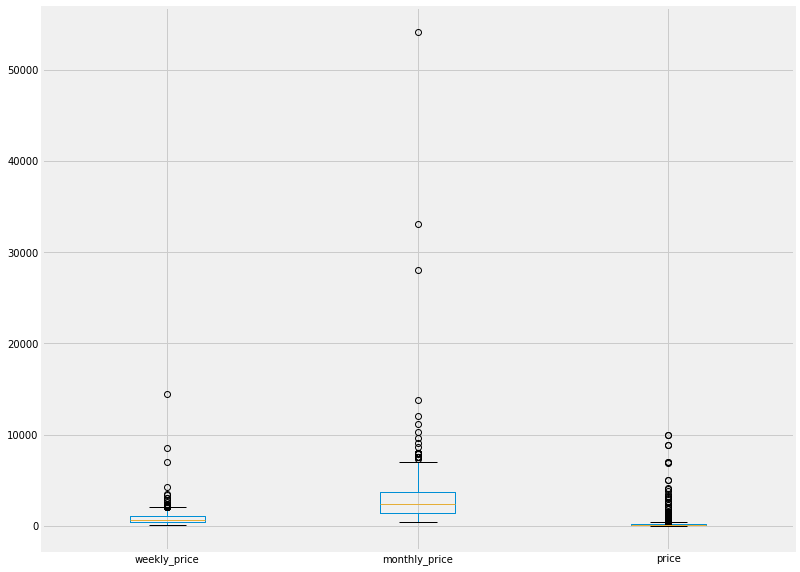

In [90]:
# checking price columns for any outliers which we can see clearly on plotting
plt.figure(figsize=(12,10))
df1[['weekly_price','monthly_price','price']].boxplot() 

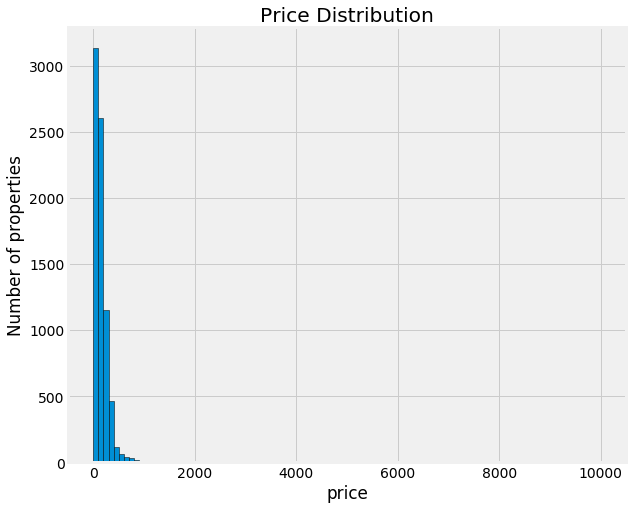

In [21]:
#checking price distrinution through out the data
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.hist(df1['price'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('price'); plt.ylabel('Number of properties'); 
plt.title('Price Distribution');

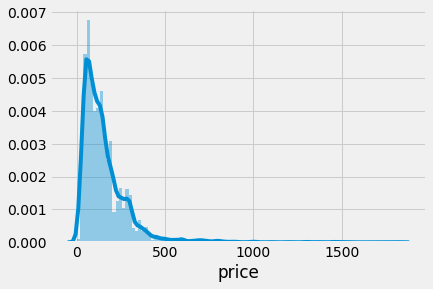

In [22]:
sns.distplot(df1[df1.price<2000].price,bins=100)

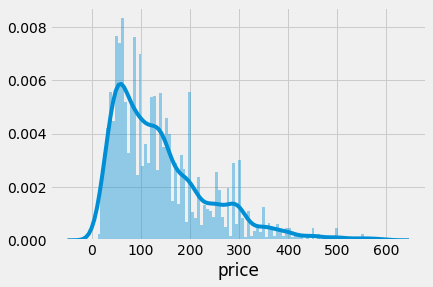

In [23]:
sns.distplot(df1[df1.price<600].price,bins=100)

In [24]:
df1.price.describe() # statistical inference of price or the target variable

count     7675.000000
mean       167.391401
std        320.818730
min          0.000000
25%         65.000000
50%        120.000000
75%        200.000000
max      10000.000000
Name: price, dtype: float64

**Calculating IQR ranges for possible outliers removals**

In [25]:
# Calculate first and third quartile
first_quartile = df1['price'].describe()['25%']
third_quartile = df1['price'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Removing outliers

iqr

135.0

**Removing outliers**

In [26]:
df1 = df1[(df1['price'] > (first_quartile - 3 * iqr)) &(df1['price'] < (third_quartile + 3 * iqr))] #removing outliers


In [27]:
df1.shape

(7549, 96)

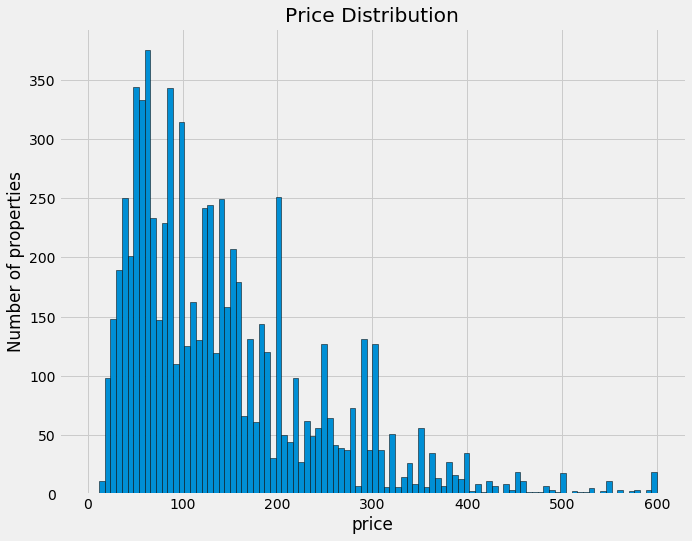

In [28]:
# post outlier treatment now price is somewhat better has got some distribution now
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.hist(df1['price'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('price'); plt.ylabel('Number of properties'); 
plt.title('Price Distribution');

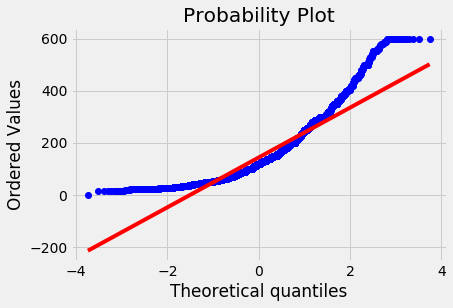

In [29]:
# checking price
fig = plt.figure()
res = stats.probplot(df1['price'], plot=plt)
plt.show()

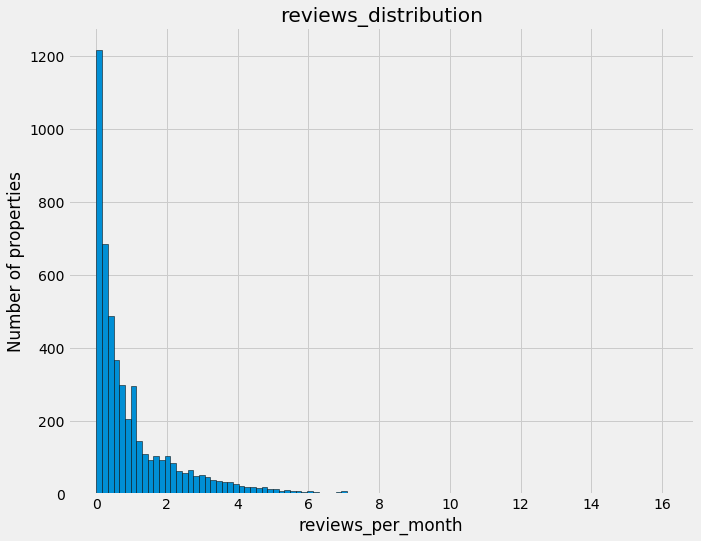

In [30]:
#checking reviews_month relation
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.hist(df1['reviews_per_month'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('reviews_per_month'); plt.ylabel('Number of properties'); 
plt.title('reviews_distribution');

In [31]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df1);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))
print(missing_columns)

Your selected dataframe has 96 columns.
There are 48 columns that have missing values.
We will remove 9 columns.
['host_acceptance_rate', 'cleaning_fee', 'jurisdiction_names', 'security_deposit', 'license', 'square_feet', 'weekly_price', 'monthly_price', 'state']


**Cheking any statistical inferences for these columns before droping**

In [32]:
df1[['jurisdiction_names', 'host_acceptance_rate', 'license', 'square_feet', 'weekly_price', 'monthly_price', 'state']].describe()

,jurisdiction_names,host_acceptance_rate,square_feet,weekly_price,monthly_price
count,0.0,0.0,44.000000,527.000000,613.000000
mean,NaN,NaN,171.090909,817.273245,2889.313214
std,NaN,NaN,257.101809,703.370420,2448.690283
min,NaN,NaN,0.000000,100.000000,450.000000
25%,NaN,NaN,0.000000,400.000000,1390.000000
50%,NaN,NaN,0.000000,600.000000,2388.000000
75%,NaN,NaN,244.750000,1019.000000,3688.000000
max,NaN,NaN,1001.000000,8534.000000,33036.000000


**We are dropping these features here**

In [33]:
# Drop the  9 columns 
df1 = df1.drop(columns = list(missing_columns))

**Treating boolean features in which 'T ' and 'F' is conveted  to 0s and 1s**

In [34]:
boolean_cols=['require_guest_profile_picture','require_guest_phone_verification', 
'requires_license','instant_bookable', 'is_business_travel_ready', 'has_availability',
'is_location_exact','host_has_profile_pic','host_identity_verified',
'host_is_superhost']

In [35]:
df1[boolean_cols].head() #converting all 't and f' columns into 0s and 1s

def converter(x):
    if x=='t':
        return 1
    elif x=='f':
        return 0

for i in boolean_cols:
    df1[i]=df1[i].apply(converter)

df1.head(2)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,none,NaN,NaN,NaN,NaN,NaN,No smoking indoors. Please turn off lights/fan...,266763,Francesca,2010-10-20,singapore,I am a private tutor by profession. My husband...,within a few hours,100.0,0.0,Woodlands,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",1.0,0.0,"Singapore, Singapore",Woodlands,Woodlands,North Region,Singapore,730702.0,Singapore,Singapore,SG,Singapore,1.44255,103.79580,1,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",83.0,1,14.0,180,360,180,180,360,360,180.0,360.0,64 months ago,1,30,60,90,365,2019-09-25,1,0,2013-10-21,2013-10-21,94.0,10.0,10.0,10.0,10.0,8.0,8.0,0,0,0,flexible,1,1,2,0,2,0,0.01
1,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,none,The serenity & quiet surrounding makes it an i...,Accommodation has a queen size bed. Suitable ...,Less than 400m from the apartment is the main ...,"Kitchen, washing facilities, gym, swimming poo...",We love to host people & have the opportunity ...,'- Should be family friendly. '- Cooking is no...,227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",NaN,NaN,0.0,Bukit Timah,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1.0,0.0,"Singapore, Singapore",Bukit Timah,Bukit Timah,Central Region,Singapore,589664.0,Singapore,Singapore,SG,Singapore,1.33235,103.78521,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",80.0,2,20.0,90,730,90,90,730,730,90.0,730.0,62 months ago,1,29,59,89,364,2019-09-25,18,0,2014-04-18,2014-12-26,91.0,9.0,10.0,10.0,10.0,9.0,9.0,0,0,0,moderate,0,1,1,0,1,0,0.27


In [36]:
df1.shape # updated after drops and cleaning some of the feature

(7549, 87)

In [37]:
missing_values_table(df1)

Your selected dataframe has 87 columns.
There are 39 columns that have missing values.


,Missing Values,% of Total Values
house_rules,3621,48.0
interaction,3218,42.6
notes,3150,41.7
neighborhood_overview,3008,39.8
transit,2974,39.4
host_about,2736,36.2
review_scores_location,2697,35.7
review_scores_value,2696,35.7
review_scores_checkin,2696,35.7
review_scores_communication,2692,35.7


In [38]:
# creating a sbset data with numerical data types only for possible feature selection
num_subset = df1.select_dtypes(['int64','float64'])
(num_subset.nunique())

id                                              7549
host_id                                         2587
host_response_rate                                56
host_is_superhost                                  2
host_listings_count                               59
host_total_listings_count                         59
host_has_profile_pic                               2
host_identity_verified                             2
zipcode                                         2095
latitude                                        4719
longitude                                       5252
is_location_exact                                  2
accommodates                                      16
bathrooms                                         25
bedrooms                                          11
beds                                              20
price                                            295
guests_included                                   13
extra_people                                  

In [39]:
num_subset.shape # now 51 features left

(7549, 51)

In [40]:
#statistical inference for numerical data subset only
pd.set_option('float_format', '{:f}'.format)
num_subset.describe()

,id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7549.000000,7549.000000,6185.000000,7548.000000,7548.000000,7548.000000,7548.000000,7548.000000,6702.000000,7549.000000,7549.000000,7549.000000,7549.000000,7544.000000,7547.000000,7535.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,4862.000000,4857.000000,4859.000000,4853.000000,4857.000000,4852.000000,4853.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,7549.000000,4999.000000
mean,23555151.202941,90959523.600477,91.854325,0.182300,45.039878,45.039878,0.998278,0.243376,299410.807371,1.314503,103.848982,0.694264,3.356604,1.548648,1.321320,1.961646,143.655584,1.970327,15.031527,18.417671,938.068088,17.345609,18.608028,921.965293,933.413035,18.340654,931.835978,1.000000,13.097629,31.207312,50.989932,208.949265,13.480858,5.601007,90.488893,9.232448,9.020580,9.496394,9.481779,9.333059,8.966000,0.000000,0.510531,0.000000,0.009008,0.010862,39.327196,27.183733,6.874288,0.230759,1.045919
std,10346609.236639,82250859.448819,18.418239,0.386117,76.799901,76.799901,0.041468,0.429148,174752.868054,0.030167,0.043716,0.460749,2.551173,1.299081,1.079027,2.170094,102.051168,1.559088,19.359301,42.202699,1675.623333,41.416361,42.362310,1677.957945,1703.010933,41.945372,1702.948633,0.000000,11.784504,23.673075,35.228468,145.618045,30.747524,11.722244,12.137514,1.245963,1.304420,1.061698,1.085003,1.000080,1.220986,0.000000,0.499922,0.000000,0.094487,0.103662,65.487880,60.310669,19.332782,1.236588,1.310161
min,49091.000000,23666.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.242790,103.665470,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,15848593.000000,23069584.000000,94.000000,0.000000,2.000000,2.000000,1.000000,0.000000,188537.000000,1.296630,103.836870,0.000000,2.000000,1.000000,1.000000,1.000000,65.000000,1.000000,0.000000,1.000000,1124.000000,1.000000,2.000000,999.000000,1000.000000,1.400000,999.000000,1.000000,0.000000,0.000000,9.000000,61.000000,0.000000,0.000000,87.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.180000
50%,24664051.000000,63360558.000000,100.000000,0.000000,9.000000,9.000000,1.000000,0.000000,239666.000000,1.311230,103.849820,1.000000,2.000000,1.000000,1.000000,1.000000,120.000000,1.000000,10.000000,3.000000,1125.000000,3.000000,3.000000,1125.000000,1125.000000,3.000000,1125.000000,1.000000,11.000000,35.000000,61.000000,267.000000,2.000000,1.000000,94.000000,10.0000

In [41]:
# checking head of dataset
num_subset.head()

,id,host_id,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,266763,100.000000,0.000000,2.000000,2.000000,1.000000,0.000000,730702.000000,1.442550,103.795800,1,1,1.000000,1.000000,1.000000,83.000000,1,14.000000,180,360,180,180,360,360,180.000000,360.000000,1,30,60,90,365,1,0,94.000000,10.000000,10.000000,10.000000,10.000000,8.000000,8.000000,0,0,0,1,1,2,0,2,0,0.010000
1,50646,227796,nan,0.000000,1.000000,1.000000,1.000000,0.000000,589664.000000,1.332350,103.785210,1,2,1.000000,1.000000,1.000000,80.000000,2,20.000000,90,730,90,90,730,730,90.000000,730.000000,1,29,59,89,364,18,0,91.000000,9.000000,10.000000,10.000000,10.000000,9.000000,9.000000,0,0,0,0,1,1,0,1,0,0.270000
2,56334,266763,100.000000,0.000000,2.000000,2.000000,1.000000,0.000000,nan,1.442460,103.796670,1,1,1.000000,1.000000,1.000000,69.000000,1,14.000000,6,14,6,6,14,14,6.000000,14.000000,1,29,59,89,364,20,0,98.000000,10.000000,10.000000,10.000000,10.000000,8.000000,9.000000,0,0,0,1,1,2,0,2,0,0.200000
3,71609,367042,100.000000,0.000000,9.000000,9.000000,1.000000,1.000000,488405.000000,1.345410,103.957120,1,6,1.000000,2.000000,3.000000,204.000000,4,28.000000,1,1125,1,1,1125,1125,1.000000,1125.000000,1,30,60,90,365,15,4,84.000000,8.000000,8.000000,9.000000,9.000000,8.000000,8.000000,0,1,0,0,1,9,0,9,0,0.160000
4,71896,367042,100.000000,0.000000,9.000000,9.000000,1.000000,1.000000,488405.000000,1.345670,103.959630,1,3,0.500000,1.000000,1.000000,94.000000,1,21.000000,1,1125,1,1,1125,1125,1.000000,1125.000000,1,30,60,90,365,22,2,81.000000,8.000000,8.000000,9.000000,9.000000,8.000000,8.000000,0,1,0,0,1,9,0,9,0,0.220000


In [42]:
 # dropping id and host_id columns
num_df1 = num_subset.drop(['id','host_id'],axis=1)

In [43]:
num_df1.shape

(7549, 49)

In [44]:
missing_values_table(num_df1) # only num values

Your selected dataframe has 49 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
review_scores_location,2697,35.700000
review_scores_value,2696,35.700000
review_scores_checkin,2696,35.700000
review_scores_communication,2692,35.700000
review_scores_accuracy,2692,35.700000
review_scores_cleanliness,2690,35.600000
review_scores_rating,2687,35.600000
reviews_per_month,2550,33.800000
host_response_rate,1364,18.100000
zipcode,847,11.200000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#8f5704;"> From here we can seperate dtypes from df1 ((7549, 87) left in which num is of (7549,51)(id and host_id if drooped it will be 49) and 36 columns are of categorical only

In [45]:
num_df1[num_df1.host_response_rate.isnull()].head(20)

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1,nan,0.000000,1.000000,1.000000,1.000000,0.000000,589664.000000,1.332350,103.785210,1,2,1.000000,1.000000,1.000000,80.000000,2,20.000000,90,730,90,90,730,730,90.000000,730.000000,1,29,59,89,364,18,0,91.000000,9.000000,10.000000,10.000000,10.000000,9.000000,9.000000,0,0,0,0,1,1,0,1,0,0.270000
18,nan,0.000000,1.000000,1.000000,1.000000,1.000000,nan,1.314200,103.902320,0,2,1.000000,1.000000,1.000000,80.000000,1,0.000000,90,1125,90,90,1125,1125,90.000000,1125.000000,1,23,53,83,173,0,0,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,1,0,1,0,nan
21,nan,0.000000,1.000000,1.000000,1.000000,0.000000,239319.000000,1.293450,103.835620,1,1,0.000000,1.000000,1.000000,56.000000,2,0.000000,90,365,90,90,365,365,90.000000,365.000000,1,29,59,89,364,27,0,86.000000,9.000000,8.000000,9.000000,9.000000,9.000000,8.000000,0,0,0,0,1,1,0,1,0,0.360000
23,nan,0.000000,1.000000,1.000000,1.000000,0.000000,nan,1.348160,103.932380,0,2,1.000000,1.000000,1.000000,37.000000,1,0.000000,180,730,180,180,730,730,180.000000,730.000000,1,29,59,89,364,0,0,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,1,0,1,0,nan
25,nan,0.000000,1.000000,1.000000,1.000000,1.000000,279889.000000,1.331710,103.793830,1,2,2.000000,2.000000,1.000000,274.000000,1,0.000000,4,90,4,4,90,90,4.000000,90.000000,1,27,57,87,362,11,0,91.000000,9.000000,8.000000,10.000000,10.000000,9.000000,9.000000,0,0,0,0,0,1,1,0,0,0.130000
28,nan,0.000000,1.000000,1.000000,1.000000,0.000000,189647.000000,1.301090,103.852340,1,2,2.000000,1.000000,1.000000,165.000000,1,28.000000,180,730,180,180,730,730,180.000000,730.000000,1,30,60,90,365,0,0,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,1,0,1,0,nan
30,nan,0.000000,1.000000,1.000000,1.000000,0.000000,271004.000000,1.309010,103.796390,1,1,1.000000,1.000000,1.000000,206.000000,1,0.000000,1,1125,1,1,1125,1125,1.000000,1125.000000,1,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,1,0,0,1,nan
31,nan,0.000000,2.000000,2.000000,1.000000,0.000000,550145.000000,1.367430,103.872880,1,1,1.000000,1.000000,1.000000,26.000000,1,15.000000,180,365,180,180,365,365,180.000000,365.000000,1,30,60,90,365,0,0,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,1,0,1,0,nan
34,nan,0.000000,1.000000,1.000000,1.000000,1.000000,550.000000,1.350010,103.871610,1,2,1.000000,1.000000,1.000000,44.000000,1,15.000000,1,30,1,1,30,30,1.000000,30.000000,1,0,0,0,0,36,0,94.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0,0,0,0,0,1,0,1,0,0.430000
35,nan,0.000000,1.000000,1.000000,1.000000,0.000000,510581.000000,1.375270,103.945620,1,1,0.500000,1.000000,1.000000,206.000000,1,0.000000,1,1,1,1,1,1,1.000000,1.000000,1,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,1,0,1,0,nan


### 1
**Findings**

* Starting from host response rate 18% data is nan after checking only for null part of the dataframe those hosts_responses
   which are null are also not  superhost except few cases like out of 50 there will be only one superhost in this case having          null response rate.
   

* host_listings_count	and host_total_listings_count	have same statistical values which indicates both are redundant and we   can go with any one and dropping the other


* host_profile pic has only 1 null value we will impute or treat later with mode probably


* same goes with host identity verified like profile pic column only 1 nan

In [46]:
num_df1[num_df1.zipcode.isnull()].head(10) # leaving zipcodes for now as it can be helpful in tree based models to divide nodes

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,100.000000,0.000000,2.000000,2.000000,1.000000,0.000000,nan,1.442460,103.796670,1,1,1.000000,1.000000,1.000000,69.000000,1,14.000000,6,14,6,6,14,14,6.000000,14.000000,1,29,59,89,364,20,0,98.000000,10.000000,10.000000,10.000000,10.000000,8.000000,9.000000,0,0,0,1,1,2,0,2,0,0.200000
7,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,nan,1.323040,103.913630,1,1,1.000000,1.000000,1.000000,50.000000,1,0.000000,90,1125,90,90,1125,1125,90.000000,1125.000000,1,0,0,24,84,174,1,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,0,0,1,1,4,0,4,0,1.860000
8,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,nan,1.324580,103.911630,1,2,1.000000,1.000000,2.000000,54.000000,1,0.000000,90,1125,90,90,1125,1125,90.000000,1125.000000,1,29,59,89,149,199,4,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,0,0,1,1,4,0,4,0,2.070000
9,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,nan,1.324610,103.911910,1,1,1.000000,1.000000,1.000000,43.000000,1,0.000000,90,1125,90,90,1125,1125,90.000000,1125.000000,1,30,60,90,151,236,4,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,0,0,1,1,4,0,4,0,2.510000
18,nan,0.000000,1.000000,1.000000,1.000000,1.000000,nan,1.314200,103.902320,0,2,1.000000,1.000000,1.000000,80.000000,1,0.000000,90,1125,90,90,1125,1125,90.000000,1125.000000,1,23,53,83,173,0,0,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,1,0,1,0,nan
23,nan,0.000000,1.000000,1.000000,1.000000,0.000000,nan,1.348160,103.932380,0,2,1.000000,1.000000,1.000000,37.000000,1,0.000000,180,730,180,180,730,730,180.000000,730.000000,1,29,59,89,364,0,0,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,1,0,1,0,nan
56,90.000000,0.000000,2.000000,2.000000,1.000000,0.000000,nan,1.373690,103.878470,0,2,1.000000,1.000000,1.000000,34.000000,1,0.000000,32,1125,32,32,1125,1125,32.000000,1125.000000,1,30,60,90,365,6,3,84.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,0,0,0,0,0,2,0,2,0,0.110000
75,44.000000,0.000000,9.000000,9.000000,1.000000,0.000000,nan,1.292130,103.769130,0,2,4.000000,1.000000,2.000000,50.000000,1,0.000000,5,1125,5,5,1125,1125,5.000000,1125.000000,1,24,54,84,353,11,1,86.000000,8.000000,8.000000,10.000000,10.000000,9.000000,9.000000,0,0,0,0,0,9,0,1,8,0.270000
91,100.000000,0.000000,1.000000,1.000000,1.000000,0.000000,nan,1.341260,103.759920,1,1,1.000000,1.000000,1.000000,81.000000,1,21.000000,14,1125,14,14,1125,1125,14.000000,1125.000000,1,29,59,89,364,0,0,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,1,0,1,0,nan
92,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.339170,103.823060,0,2,1.000000,1.000000,1.000000,89.000000,1,0.000000,2,1125,2,2,1125,1125,2.000000,1125.000000,1,23,40,70,342,81,18,96.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,0,0,0,1,1,2,0,2,0,1.130000


In [61]:
# Get the columns with > 30% missing for reviews related only
missing_numdf = missing_values_table(num_df1);
missing_numcolumns = pd.DataFrame(missing_numdf[missing_numdf['% of Total Values'] > 30].index)
print(missing_numcolumns)

Your selected dataframe has 49 columns.
There are 18 columns that have missing values.
                             0
0       review_scores_location
1          review_scores_value
2        review_scores_checkin
3  review_scores_communication
4       review_scores_accuracy
5    review_scores_cleanliness
6         review_scores_rating
7            reviews_per_month


In [81]:
#num_df1[missing_numcolumns].describe().T

### Missing value visualisation using missingno library

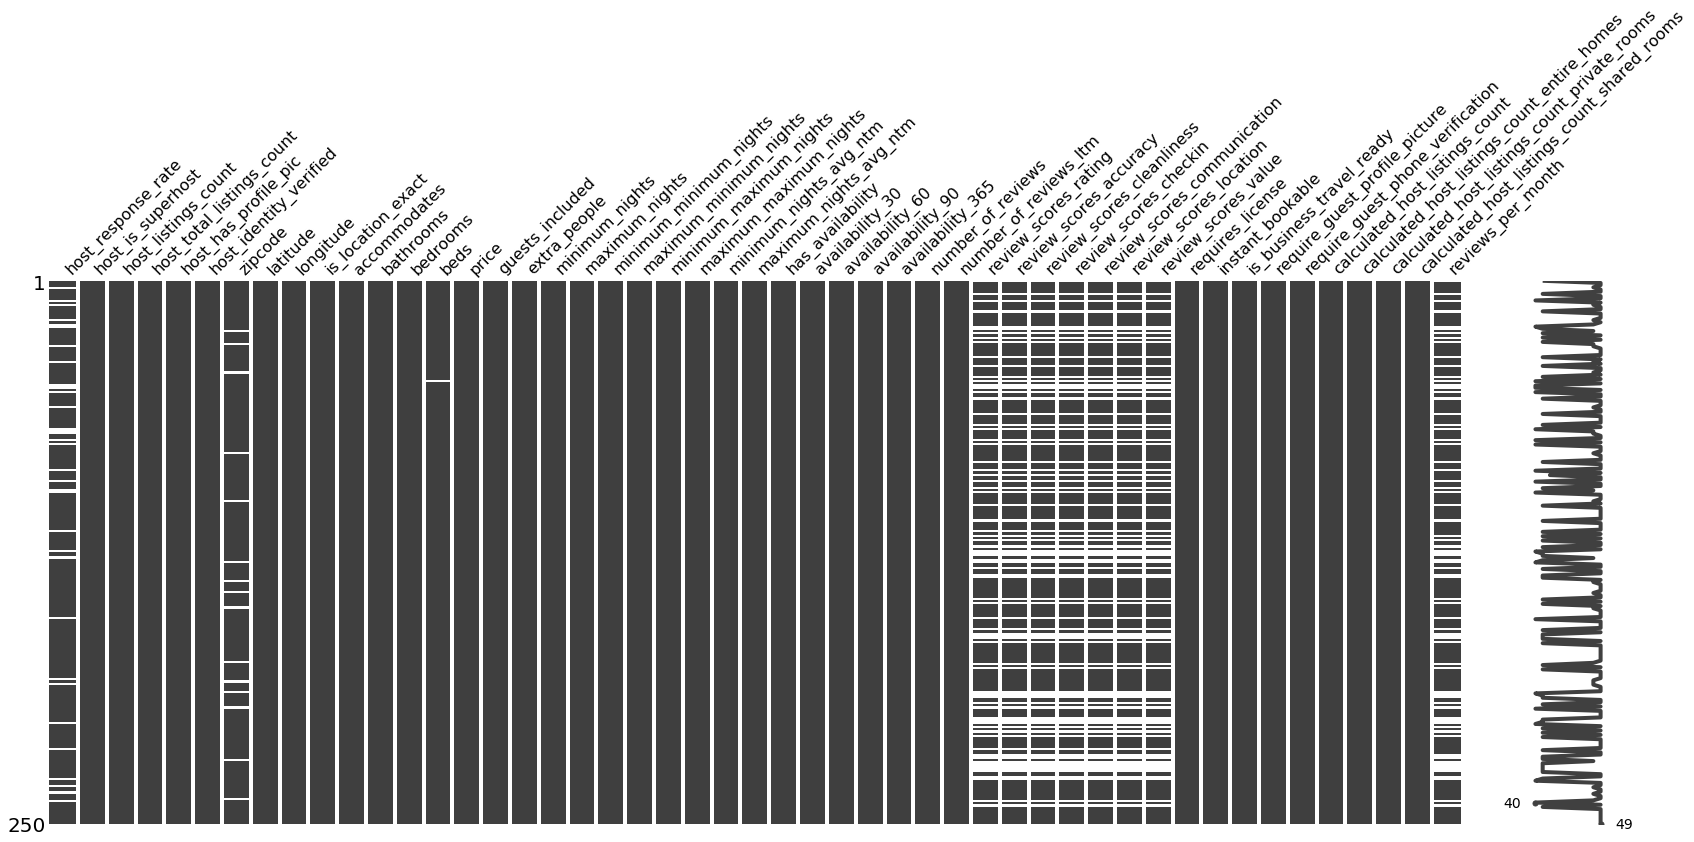

In [49]:
import missingno as msno
%matplotlib inline
msno.matrix(num_df1.sample(250))

* At a glance full grey coloured with no white lines  appear to be completely populated or no null values.
E.g : host_is_superhost, latitude,longitude,host_profile_pic,has_availbility,max_nights ..etc

* The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

* Least populated columns are reviews_score_ratings,score_values.. all reviews related columns with max whitelines

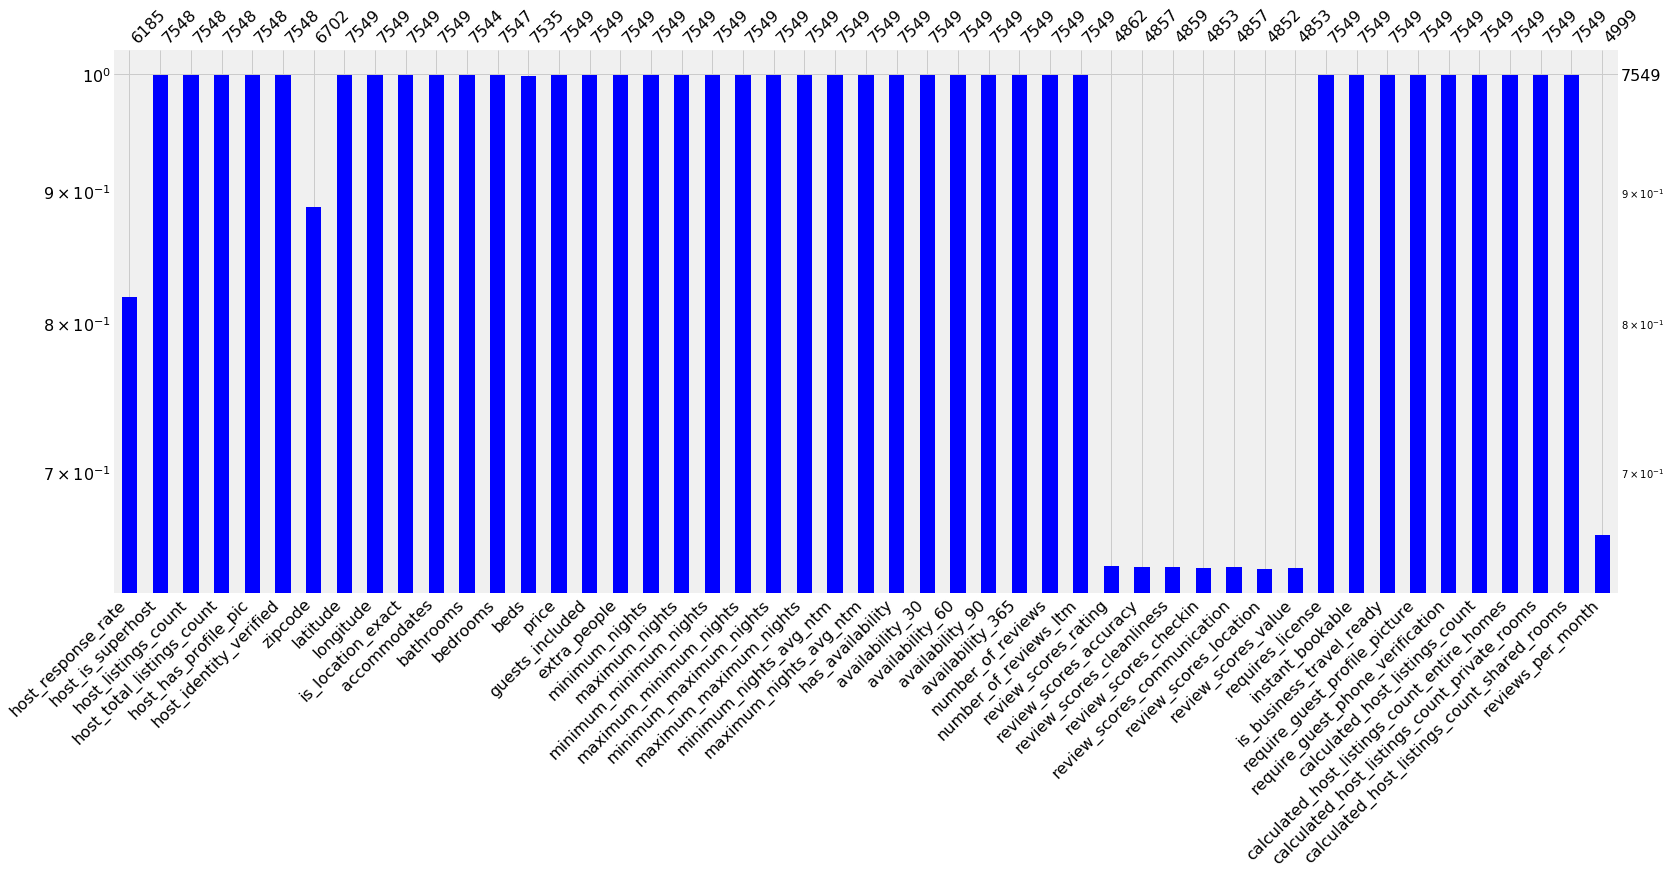

In [50]:
msno.bar(num_df1,log=True, color="blue")

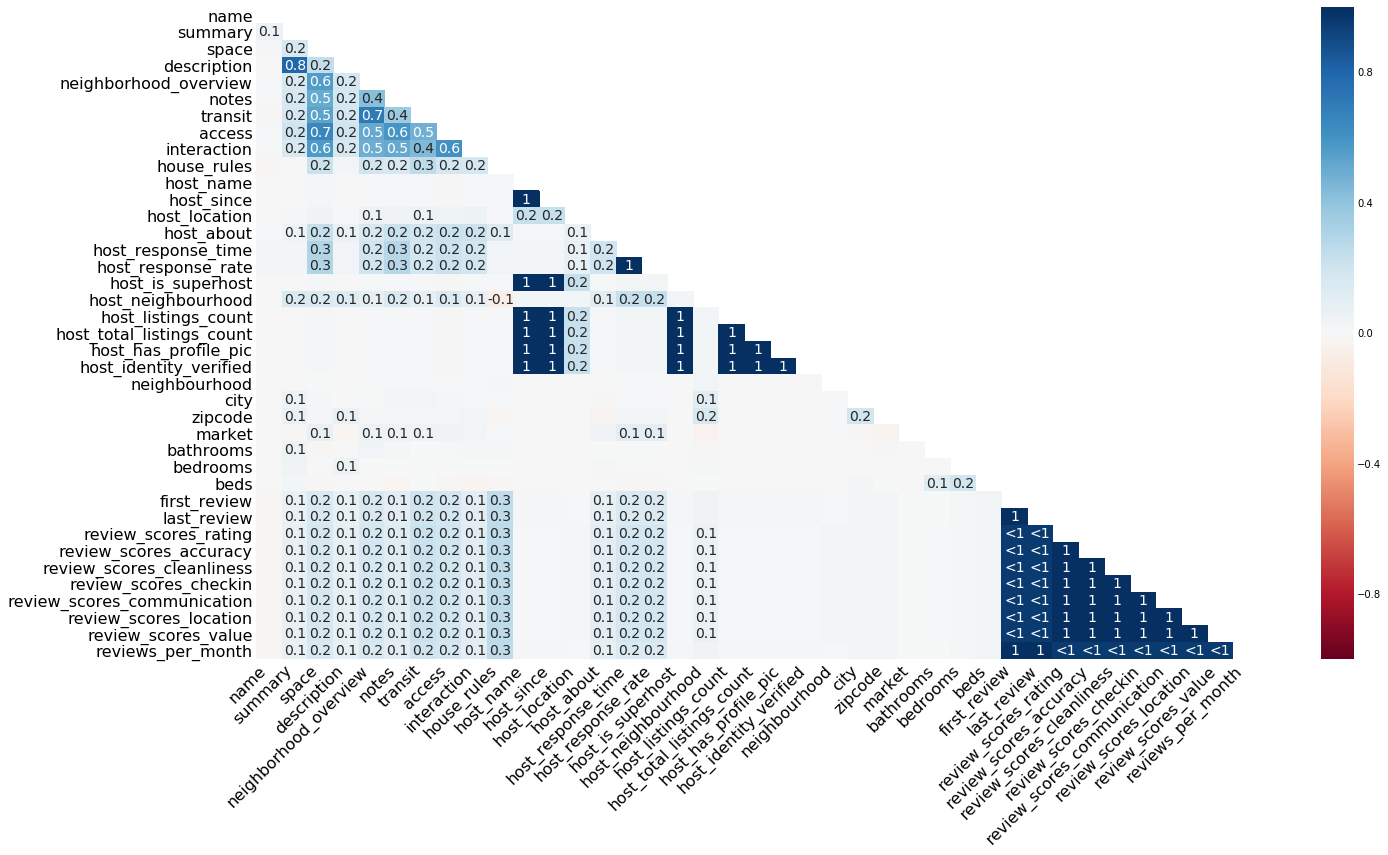

In [51]:
msno.heatmap(df1)

* **This map describes the degree of nullity relationship between the different features. The range of this nullity correlation is from -1 to 1 (-1 ≤ R ≤ 1). Features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed. Also, a perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing.**

* **Ideally if reviews are not available we would have  dropped but almost 50% missing data so we have to impute it anyway by checking the initial statistical inference from review columns we found that most of the reviews are close to 9  and overall review scores is scaled to 100 and max value is lying  near to 90 out of 100. Based on such inferences we have to impute the null values.**

In [ ]:
#from sklearn.impute import SimpleImputer

In [ ]:
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
#imp = imp.fit(num_df1[missing_numcolumns])

In [ ]:
#num_df1[missing_numcolumns]= imp.transform(num_df1[missing_numcolumns])

In [ ]:
#num_df1[missing_numcolumns].describe().T # imputed review columns

        these can impute on the basis of the host_id as for the particular host the details of the beds bathrooms and bedrooms are almost same depensing on the combination

**Now after imputing the null values for**
**['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',**
**'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value', 'reviews_per_month']**

In [52]:
missing_values_table(num_df1)

Your selected dataframe has 49 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
review_scores_location,2697,35.700000
review_scores_value,2696,35.700000
review_scores_checkin,2696,35.700000
review_scores_communication,2692,35.700000
review_scores_accuracy,2692,35.700000
review_scores_cleanliness,2690,35.600000
review_scores_rating,2687,35.600000
reviews_per_month,2550,33.800000
host_response_rate,1364,18.100000
zipcode,847,11.200000


In [57]:
from missingpy import KNNImputer
imputer = KNNImputer(missing_values="NaN", n_neighbors=5, weights="uniform", metric="masked_euclidean", row_max_missing=0.5, 
                 col_max_missing=0.8, copy=True)

In [66]:
num_df1= imputer.fit_transform(num_df1)

C:\Users\sinha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\sinha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)


In [ ]:
# verf few numbers so we are taking into count these values as zero
#num_df1['beds'].fillna(0,inplace=True)
#num_df1['bathrooms'].fillna(0,inplace=True)
#num_df1['bedrooms'].fillna(0,inplace=True)

In [ ]:
#num_df1[num_df1['host_listings_count'].isnull()]

In [ ]:
#missing_values_table(num_df1) # thsi is left to be treated in num values

In [ ]:
#num_df1['host_response_rate'].describe()

In [ ]:
#num_df1[(num_df1['beds'].isnull())]

In [74]:
df = pd.DataFrame(num_df1,columns=num_subset.drop(['id','host_id'],axis=1).columns)


In [75]:
missing_values_table(df)

Your selected dataframe has 49 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [76]:
df.head()

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100.000000,0.000000,2.000000,2.000000,1.000000,0.000000,730702.000000,1.442550,103.795800,1.000000,1.000000,1.000000,1.000000,1.000000,83.000000,1.000000,14.000000,180.000000,360.000000,180.000000,180.000000,360.000000,360.000000,180.000000,360.000000,1.000000,30.000000,60.000000,90.000000,365.000000,1.000000,0.000000,94.000000,10.000000,10.000000,10.000000,10.000000,8.000000,8.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.010000
1,88.000000,0.000000,1.000000,1.000000,1.000000,0.000000,589664.000000,1.332350,103.785210,1.000000,2.000000,1.000000,1.000000,1.000000,80.000000,2.000000,20.000000,90.000000,730.000000,90.000000,90.000000,730.000000,730.000000,90.000000,730.000000,1.000000,29.000000,59.000000,89.000000,364.000000,18.000000,0.000000,91.000000,9.000000,10.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.270000
2,100.000000,0.000000,2.000000,2.000000,1.000000,0.000000,307400.800000,1.442460,103.796670,1.000000,1.000000,1.000000,1.000000,1.000000,69.000000,1.000000,14.000000,6.000000,14.000000,6.000000,6.000000,14.000000,14.000000,6.000000,14.000000,1.000000,29.000000,59.000000,89.000000,364.000000,20.000000,0.000000,98.000000,10.000000,10.000000,10.000000,10.000000,8.000000,9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.200000
3,100.000000,0.000000,9.000000,9.000000,1.000000,1.000000,488405.000000,1.345410,103.957120,1.000000,6.000000,1.000000,2.000000,3.000000,204.000000,4.000000,28.000000,1.000000,1125.000000,1.000000,1.000000,1125.000000,1125.000000,1.000000,1125.000000,1.000000,30.000000,60.000000,90.000000,365.000000,15.000000,4.000000,84.000000,8.000000,8.000000,9.000000,9.000000,8.000000,8.000000,0.000000,1.000000,0.000000,0.000000,1.000000,9.000000,0.000000,9.000000,0.000000,0.160000
4,100.000000,0.000000,9.000000,9.000000,1.000000,1.000000,488405.000000,1.345670,103.959630,1.000000,3.000000,0.500000,1.000000,1.000000,94.000000,1.000000,21.000000,1.000000,1125.000000,1.000000,1.000000,1125.000000,1125.000000,1.000000,1125.000000,1.000000,30.000000,60.000000,90.000000,365.000000,22.000000,2.000000,81.000000,8.000000,8.000000,9.000000,9.000000,8.000000,8.000000,0.000000,1.000000,0.000000,0.000000,1.000000,9.000000,0.000000,9.000000,0.000000,0.220000


In [77]:
num_clean = df.to_csv('num_ready.csv',index=False)

## Categorical Features

In [82]:
cat_subset = df1.select_dtypes(['object'])

In [83]:
missing_values_table(cat_subset) # categorial only dtypes and its null values

Your selected dataframe has 36 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
house_rules,3621,48.000000
interaction,3218,42.600000
notes,3150,41.700000
neighborhood_overview,3008,39.800000
transit,2974,39.400000
host_about,2736,36.200000
access,2673,35.400000
first_review,2550,33.800000
last_review,2550,33.800000
space,1955,25.900000


### now we have to look into categorical data type cleaning or binning the columns like ammenties , host_verification which has large number of unique values inside a list


In [84]:
cat_subset.shape

(7549, 36)

In [85]:
cat_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7549 entries, 0 to 7674
Data columns (total 36 columns):
name                            7548 non-null object
summary                         7301 non-null object
space                           5594 non-null object
description                     7392 non-null object
experiences_offered             7549 non-null object
neighborhood_overview           4541 non-null object
notes                           4399 non-null object
transit                         4575 non-null object
access                          4876 non-null object
interaction                     4331 non-null object
house_rules                     3928 non-null object
host_name                       7548 non-null object
host_since                      7548 non-null object
host_location                   7530 non-null object
host_about                      4813 non-null object
host_response_time              6185 non-null object
host_neighbourhood              6639 non-null

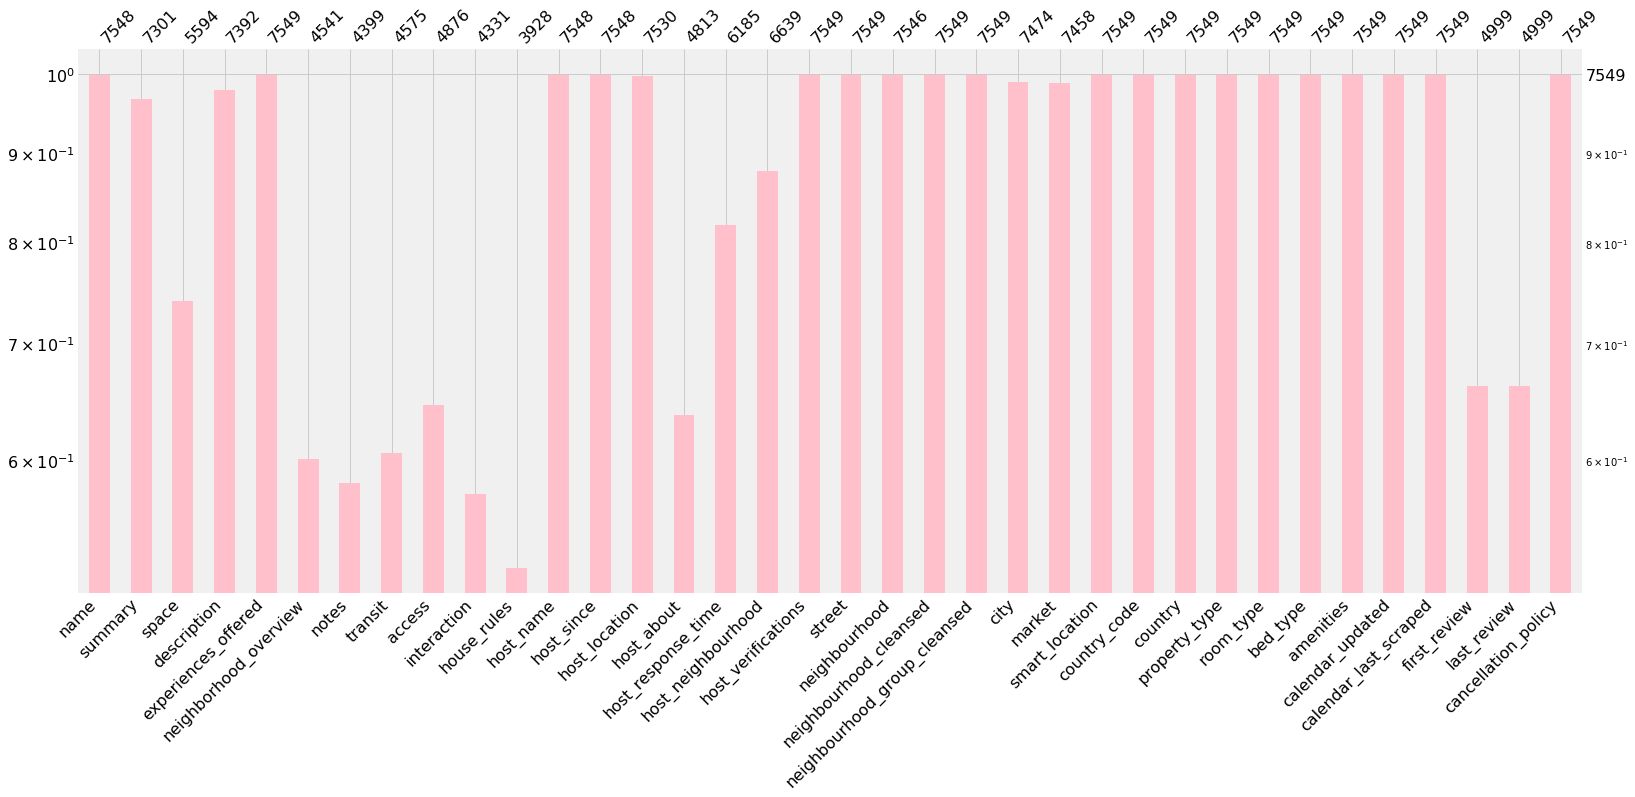

In [87]:
cat_subset = df1.select_dtypes(['object'])
msno.bar(cat_subset,log=True, color="pink")